In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r drive/'My Drive'/2008.csv /content/

# Table of Contents

- Introduction.

- Data Processing.

- Visualization.

- Interaction.

- Convert category to label encoder.

- Model.
    - Naive Bayse.
    - Decision Tree.
    - Random Forest.
- PCA.
    - Naive Bayse with PCA.
    - Decision Tree with PCA.
    - Random Forest with PCA.
- GridsearchCV.
    - Decision Tree.
    - Random Forest.
- Conclusions

# Introduction

Tập dư liệu Airline Arrivals [http://stat-computing.org/dataexpo/2009/the-data.html](http://) dùng dể dự đoán khi nào chuyến bay sẽ bị trễ. Một chuyến bay trễ khi nó có thời gian khởi hành thực tế bị trễ hơn 30 phút so với thời gian dự kiến.

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [0]:
data = pd.read_csv('/content/2008.csv')

In [97]:
data.shape

(7009728, 29)

Dữ liệu gồm hơn 7 triêu dòng và 29 cột.

Lấy random 1 triệu dòng từ dữ liệu.

In [0]:
data = data.sample(n=1000000, random_state=2)

In [99]:
data.shape

(1000000, 29)

In [0]:
data.reset_index(inplace=True)
data.drop(columns=['index'], inplace=True)

In [101]:
pd.set_option('display.max_columns', None) 
data.head(15)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,27,5,1953.0,2000,2100.0,2105,OH,5778,N510CA,67.0,65.0,52.0,-5.0,-7.0,CVG,GRR,268,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,7,27,7,1042.0,1036,1112.0,1100,AS,65,N708AS,30.0,24.0,17.0,12.0,6.0,WRG,PSG,31,2.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,3,27,4,1449.0,1454,1945.0,1957,NW,118,N359NW,176.0,183.0,153.0,-12.0,-5.0,PHX,MSP,1276,14.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,11,20,4,1615.0,1620,NaN,1843,US,128,N626AW,NaN,83.0,NaN,NaN,-5.0,LAX,PHX,370,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,1,2,2150.0,2115,2307.0,2251,CO,1427,N73291,197.0,216.0,177.0,16.0,35.0,IAH,ONT,1334,4.0,16.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
5,2008,8,29,5,1514.0,1513,1647.0,1702,FL,238,N991AT,93.0,109.0,77.0,-15.0,1.0,PBI,ATL,545,7.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,6,19,4,1434.0,1435,1638.0,1546,CO,1015,N17644,124.0,71.0,41.0,52.0,-1.0,IAH,DFW,224,7.0,76.0,0,NaN,0,0.0,0.0,52.0,0.0,0.0
7,2008,1,23,3,1103.0,1105,1236.0,1240,MQ,3634,N942AE,93.0,95.0,75.0,-4.0,-2.0,JAN,DFW,408,8.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,25,5,2055.0,2100,2209.0,2212,US,2144,N765US,74.0,72.0,42.0,-3.0,-5.0,LGA,BOS,185,3.0,29.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,3,1,6,2149.0,2118,2353.0,2319,AS,203,N548AS,124.0,121.0,111.0,34.0,31.0,SFO,SEA,679,4.0,9.0,0,NaN,0,0.0,0.0,3.0,0.0,31.0


Dữ liệu gồm cả dạng số và category.


Mô tả dữ liệu:

1	Year	1987-2008

2	Month	1-12

3	DayofMonth	1-31

4	DayOfWeek	1 (Monday) - 7 (Sunday)

5	DepTime	actual departure time (local, hhmm)

6	CRSDepTime	scheduled departure time (local, hhmm)

7	ArrTime	actual arrival time (local, hhmm)

8	CRSArrTime	scheduled arrival time (local, hhmm)

9	UniqueCarrier	unique carrier code

10	FlightNum	flight number

11	TailNum	plane tail number

12	ActualElapsedTime	in minutes

13	CRSElapsedTime	in minutes

14	AirTime	in minutes

15	ArrDelay	arrival delay, in minutes

16	DepDelay	departure delay, in minutes

17	Origin	origin IATA airport code

18	Dest	destination IATA airport code

19	Distance	in miles

20	TaxiIn	taxi in time, in minutes

21	TaxiOut	taxi out time in minutes

22	Cancelled	was the flight cancelled?

23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

24	Diverted	1 = yes, 0 = no

25	CarrierDelay	in minutes

26	WeatherDelay	in minutes

27	NASDelay	in minutes

28	SecurityDelay	in minutes

29	LateAircraftDelay	in minutes

In [102]:
data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,980486.000000,1000000.000000,978286.000000,1000000.000000,1000000.000000,977857.000000,999898.000000,977857.000000,977857.000000,980486.000000,1000000.000000,978286.000000,980368.000000,1000000.000000,1000000.000000,217735.000000,217735.000000,217735.000000,217735.000000,217735.000000
mean,2008.0,6.376203,15.724883,3.925644,1333.364464,1325.790561,1481.013849,1494.341462,2225.533291,127.400973,128.934404,104.097691,8.210101,10.014190,726.891603,6.866082,16.446858,0.019684,0.002459,15.802586,3.036379,17.225182,0.072037,20.823083
std,0.0,3.406933,8.795606,1.988100,478.344065,464.408978,505.419466,482.970416,1962.351421,70.262671,69.447821,67.503104,38.633606,35.335279,562.500094,4.943133,11.369636,0.138912,0.049527,40.018807,19.616256,32.295436,1.835315,39.268091
min,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,15.000000,-141.000000,0.000000,-86.000000,-92.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,928.000000,925.000000,1106.000000,1115.000000,623.000000,77.000000,80.000000,55.000000,-10.000000,-4.000000,325.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1325.000000,1320.000000,1512.000000,1517.000000,1569.000000,110.000000,111.000000,86.000000,-2.000000,-1.000000,581.000000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
75%,2008.0,9.000000,23.000000,6.000000,1728.000000,1715.000000,1909.000000,1907.000000,3532.000000,157.000000,159.000000,132.000000,12.000000,8.000000,954.000000,8.000000,19.000000,0.000000,0.000000,16.000000,0.000000,21.000000,0.000000,26.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9743.000000,1379.000000,660.000000,1350.000000,1583.000000,1552.000000,4962.000000,233.000000,393.000000,1.000000,1.000000,1552.000000,1153.000000,1357.000000,284.000000,983.000000


Dữ liệu chứa feature Year thừa và có một số outline cần xử lý

# Data Processing

Dữ liệu chỉ trên năm 2008 nên ta sẽ bỏ feature Year

In [0]:
data.drop(columns=['Year'], inplace=True)

Có một số giá trị âm là CRSElapsedTime, ArrDelay và DepDelay ArrDelay và DepDelay âm có thể do máy bay đến hoặc khởi hành sớm hơn dự kiến CRSElapsedTime có thể do nhập sai

In [104]:
data[data['CRSElapsedTime'] < 0]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
376164,7,15,2,1324.0,1330,1358.0,1109,HA,344,N479HA,34.0,-141.0,22.0,169.0,-6.0,LIH,HNL,102,6.0,6.0,0,NaN,0,169.0,0.0,0.0,0.0,0.0
522024,7,28,1,1327.0,1330,1354.0,1109,HA,344,N481HA,27.0,-141.0,18.0,165.0,-3.0,LIH,HNL,102,4.0,5.0,0,NaN,0,165.0,0.0,0.0,0.0,0.0


Chỉ có một số nhỏ giá trị CRSElapsedTime âm.

Ta sẽ lọa bỏ dòng có CRSElapsedTime chứa giá trị âm.

In [0]:
data.drop(data[data['CRSElapsedTime']<0].index, inplace=True)

#### Missing values

In [106]:
data.isnull().sum()*100/len(data)

Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               1.951404
CRSDepTime            0.000000
ArrTime               2.171404
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               1.191302
ActualElapsedTime     2.214304
CRSElapsedTime        0.010200
AirTime               2.214304
ArrDelay              2.214304
DepDelay              1.951404
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                2.171404
TaxiOut               1.963204
Cancelled             0.000000
CancellationCode     98.031596
Diverted              0.000000
CarrierDelay         78.226656
WeatherDelay         78.226656
NASDelay             78.226656
SecurityDelay        78.226656
LateAircraftDelay    78.226656
dtype: float64

CarrierDelay, WeatherDelay, NASDelay, SecurityDelay và LateAircraftDelay sẽ bằng NaN nếu không bị delay.

Giá trị DepDelay sẽ băng tổng 4 cột này cộng lại và cộng thêm 1 giá trị nào đó. Hơn nữa CarrierDelay, WeatherDelay, NASDelay, SecurityDelay và LateAircraftDelay có tỷ lệ missing value lớn nên ta se loại bỏ cột này.

DepTime và ArrTime có ảnh hưởng rất lớn đến kết quả dự đoán nên ta sẽ loại bỏ 2 feature này.

CancellationCode có tỷ lệ missing value lớn nên ta se loại bỏ cột này.

Các cột DepTime, ArrTime, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, TaxiIn, TaxiOut có tỷ lệ missing values nhỏ nên ta sẽ loại bỏ các hàng chứa missing values

In [0]:
data.drop(columns=['CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 
                   'LateAircraftDelay', 'DepTime', 'ArrTime'], inplace=True)

columns = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
           'DepDelay', 'TaxiIn', 'TaxiOut', 'TailNum']
for column in columns:
    data = data.drop(data[data[column].isnull()].index)

In [108]:
data.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,6,27,5,2000,2105,OH,5778,N510CA,67.0,65.0,52.0,-5.0,-7.0,CVG,GRR,268,5.0,10.0,0,0
1,7,27,7,1036,1100,AS,65,N708AS,30.0,24.0,17.0,12.0,6.0,WRG,PSG,31,2.0,11.0,0,0
2,3,27,4,1454,1957,NW,118,N359NW,176.0,183.0,153.0,-12.0,-5.0,PHX,MSP,1276,14.0,9.0,0,0
4,1,1,2,2115,2251,CO,1427,N73291,197.0,216.0,177.0,16.0,35.0,IAH,ONT,1334,4.0,16.0,0,0
5,8,29,5,1513,1702,FL,238,N991AT,93.0,109.0,77.0,-15.0,1.0,PBI,ATL,545,7.0,9.0,0,0


In [109]:
data.shape

(977855, 20)

## Tranform data

Biến đôi DepTime, CRSDepTime, ArrTime, CRSArrTime thành:

DepTime_Hours, DepTime_Minutes, CRSDepTime_Hours, CRSDepTime_Minutes, ArrTime_Hours, ArrTime_Minutes, CRSArrTime_Hours, CRSArrTime_Minutes.

In [0]:
def int_to_string(time_float):
    time_int = int(time_float)
    time_string = str(time_int)
    if(len(time_string) == 1):
        time_string = '000' + time_string
    elif(len(time_string) == 2):
        time_string = '00' + time_string
    return time_string

In [0]:
data['CRSDepTime'] = data['CRSDepTime'].apply(lambda x: int_to_string(x))
data['CRSArrTime'] = data['CRSArrTime'].apply(lambda x: int_to_string(x))

In [0]:
data['CRSDepTimehhmm'] = pd.to_datetime(data['CRSDepTime'], errors ='coerce', format = '%H%M')
data['CRSArrTimehhmm'] = pd.to_datetime(data['CRSArrTime'], errors ='coerce', format = '%H%M')

Remove những những giá trị không hợp lệ

In [0]:
columns = ['CRSDepTimehhmm', 'CRSArrTimehhmm']
for column in columns:
    data = data.drop(data[data[column].isnull()].index)

In [0]:
data['CRSDepTime_Hours'] = data['CRSDepTimehhmm'].dt.hour
data['CRSDepTime_Minutes'] = data['CRSDepTimehhmm'].dt.minute

data['CRSArr_Hours'] = data['CRSArrTimehhmm'].dt.hour
data['CRSArr_Minutes'] = data['CRSArrTimehhmm'].dt.minute

Các feature DepTime, CRSDepTime, ArrTime, CRSArrTime, DepTimehhmm, CRSDepTimehhmm, ArrTimehhmm, CRSArrTimehhmm đã được tranform nên ta sẽ loại bỏ.

In [0]:
data.drop(columns=[ 'CRSDepTime', 'CRSArrTime', 'CRSDepTimehhmm',
                    'CRSArrTimehhmm'], inplace=True)

Thêm cột xác Delay, nếu chuyến bay khởi hành trễ hơn 30p thì giá trị cột Delay bằng True, ngược lại False.

Ta sẽ loại bỏ Feature DepDelay.

In [0]:
data['Delay'] = data['DepDelay'].apply(lambda x: 1 if (x> 29) else 0)
data.drop(columns=['DepDelay'], inplace=True)


In [117]:
data.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CRSDepTime_Hours,CRSDepTime_Minutes,CRSArr_Hours,CRSArr_Minutes,Delay
0,6,27,5,OH,5778,N510CA,67.0,65.0,52.0,-5.0,CVG,GRR,268,5.0,10.0,0,0,20,0,21,5,0
1,7,27,7,AS,65,N708AS,30.0,24.0,17.0,12.0,WRG,PSG,31,2.0,11.0,0,0,10,36,11,0,0
2,3,27,4,NW,118,N359NW,176.0,183.0,153.0,-12.0,PHX,MSP,1276,14.0,9.0,0,0,14,54,19,57,0
4,1,1,2,CO,1427,N73291,197.0,216.0,177.0,16.0,IAH,ONT,1334,4.0,16.0,0,0,21,15,22,51,1
5,8,29,5,FL,238,N991AT,93.0,109.0,77.0,-15.0,PBI,ATL,545,7.0,9.0,0,0,15,13,17,2,0


# Visualization

## Delay

In [118]:
len(data[data['Delay']==True])/len(data)

0.1223749942476134

Tỷ lệ Delay bằng 12% tổng số chuyến bay, ta sẽ sử dụng các thuật toán giải quyết tốt dữ liệu imbalance: Naive Bayes, Random Forest, Decison tree.

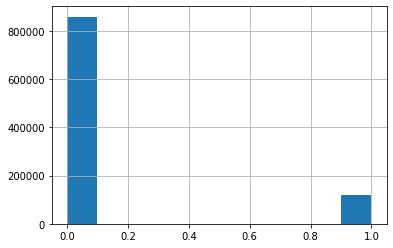

In [119]:
data['Delay'].hist()

## ActualElapsedTime

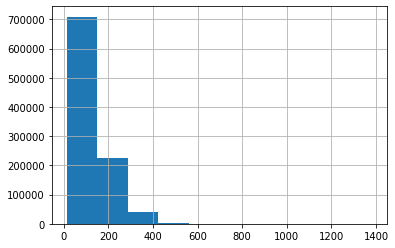

In [120]:
data.ActualElapsedTime.hist()

In [121]:
print('Tỷ lệ chuyến bay có ActualElapsedTime > 550: ', len(data[data['ActualElapsedTime'] > 550]) * 100 /len(data), '%')

Tỷ lệ chuyến bay có ActualElapsedTime > 550:  0.026486544528585527 %


Tỷ lệ chuyến bay có ActualElapsedTime lớn hơn 550 là rất nhó so với tổng số chuyến bay nên ta có sẽ remove nó.

In [0]:
data = data[data['ActualElapsedTime'] <= 550]

## ArrDelay

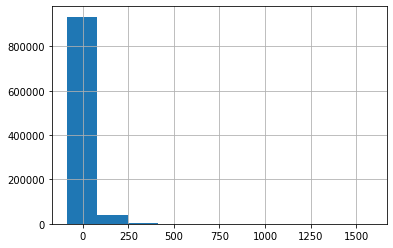

In [123]:
data.ArrDelay.hist()

In [124]:
print('Tỷ lệ chuyến bay có ArrDelay > 400: ', len(data[data['ArrDelay'] > 400]) * 100 /len(data), '%')

Tỷ lệ chuyến bay có ArrDelay > 400:  0.05104358037471512 %


Tỷ lệ chuyến bay có ArrDelay lớn hơn 400 là rất nhó so với tổng số chuyến bay nên ta có sẽ remove nó.

In [0]:
data = data[data['ArrDelay'] <= 400]

## Distance

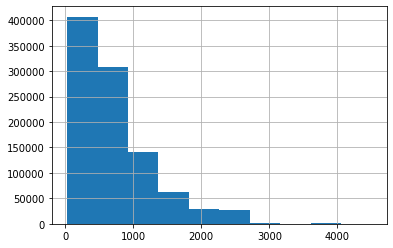

In [126]:
data.Distance.hist()

In [127]:
print('Tỷ lệ chuyến bay có Distance > 3500: ', len(data[data['Distance'] > 3500]) * 100 /len(data), '%')

Tỷ lệ chuyến bay có Distance > 3500:  0.09466818545139326 %


Tỷ lệ chuyến bay có ArrDelay lớn hơn 400 là rất nhó so với tổng số chuyến bay nên ta có sẽ remove nó.

In [0]:
data = data[data['Distance'] < 3500]

## TaxiIn

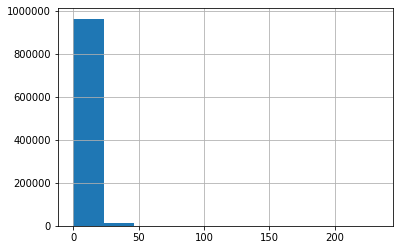

In [129]:
data.TaxiIn.hist()

In [130]:
print('Tỷ lệ chuyến bay có TaxiIn > 50: ', len(data[data['TaxiIn'] > 50]) * 100 /len(data), '%')

Tỷ lệ chuyến bay có TaxiIn > 50:  0.09076269345975914 %


Tỷ lệ chuyến bay có TaxiIn lớn hơn 50 là rất nhó so với tổng số chuyến bay nên ta có sẽ remove nó.

In [0]:
data = data[data['TaxiIn'] <= 50]

## TaxiOut

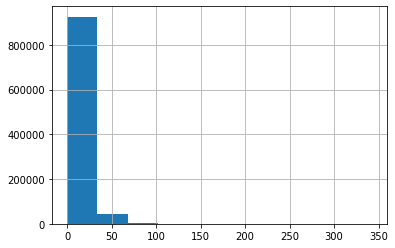

In [132]:
data.TaxiOut.hist()

In [133]:
print('Tỷ lệ chuyến bay có TaxiOut > 150: ', len(data[data['TaxiOut'] > 150]) * 100 /len(data), '%')

Tỷ lệ chuyến bay có TaxiOut > 150:  0.040500940237017655 %


Tỷ lệ chuyến bay có TaxiOut lớn hơn 150 là rất nhó so với tổng số chuyến bay nên ta có sẽ remove nó.

In [0]:
data = data[data['TaxiOut'] <= 150]

# Interaction

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974891 entries, 0 to 999999
Data columns (total 22 columns):
Month                 974891 non-null int64
DayofMonth            974891 non-null int64
DayOfWeek             974891 non-null int64
UniqueCarrier         974891 non-null object
FlightNum             974891 non-null int64
TailNum               974891 non-null object
ActualElapsedTime     974891 non-null float64
CRSElapsedTime        974891 non-null float64
AirTime               974891 non-null float64
ArrDelay              974891 non-null float64
Origin                974891 non-null object
Dest                  974891 non-null object
Distance              974891 non-null int64
TaxiIn                974891 non-null float64
TaxiOut               974891 non-null float64
Cancelled             974891 non-null int64
Diverted              974891 non-null int64
CRSDepTime_Hours      974891 non-null int64
CRSDepTime_Minutes    974891 non-null int64
CRSArr_Hours          974891 non-null

## Month

In [0]:
month = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12']

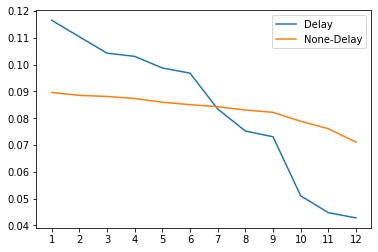

In [137]:
fig, ax = plt.subplots()
ax.plot(month, data[data['Delay']==1].Month.value_counts()/len(data[data['Delay']==1]), label="Delay")
ax.plot(month, data[data['Delay']==0].Month.value_counts()/len(data[data['Delay']==0]), label="None-Delay")
ax.legend()

plt.show()

Tỷ lệ chuyến bay bị Delay ở những tháng đầu năm cao hơn nhiều những chuyến bay ở nhưng tháng cuối năm. 

Tỷ lệ chuyến bay không Delay  giảm nhẹ khi vào cuối năm.

## DayOfMonth

In [0]:
dayofmonth = []
for i in range(1, 32):
  dayofmonth.append(str(i))

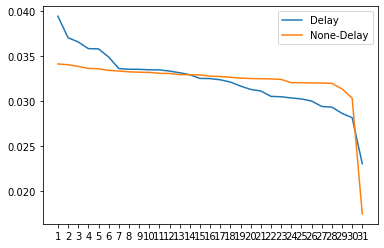

In [139]:
fig, ax = plt.subplots()
ax.plot(dayofmonth, data[data['Delay']==1].DayofMonth.value_counts()/len(data[data['Delay']==1]), label="Delay")
ax.plot(dayofmonth, data[data['Delay']==0].DayofMonth.value_counts()/len(data[data['Delay']==0]), label="None-Delay")
ax.legend()

plt.show()

Tỷ lệ Delay ở đầu tháng cao hơn 1 chút so với cuối tháng.

## DayOfWeek

In [0]:
day_of_week = [1, 2, 3, 4, 5, 6, 7]

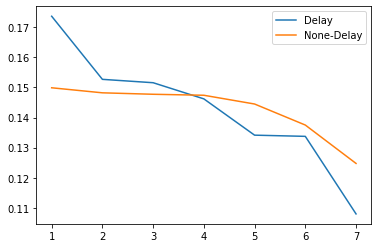

In [141]:
fig, ax = plt.subplots()
ax.plot(day_of_week, data[data['Delay']==1].DayOfWeek.value_counts()/len(data[data['Delay']==1]), label="Delay")
ax.plot(day_of_week, data[data['Delay']==0].DayOfWeek.value_counts()/len(data[data['Delay']==0]), label="None-Delay")
ax.legend()

plt.show()

Vào chủ nhật có tỷ lệ Delay cao hơn các ngày khác.

# Convert category to label encoder.

In [0]:
X = data.drop(columns=['Delay'])
y = data['Delay']

In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974891 entries, 0 to 999999
Data columns (total 21 columns):
Month                 974891 non-null int64
DayofMonth            974891 non-null int64
DayOfWeek             974891 non-null int64
UniqueCarrier         974891 non-null object
FlightNum             974891 non-null int64
TailNum               974891 non-null object
ActualElapsedTime     974891 non-null float64
CRSElapsedTime        974891 non-null float64
AirTime               974891 non-null float64
ArrDelay              974891 non-null float64
Origin                974891 non-null object
Dest                  974891 non-null object
Distance              974891 non-null int64
TaxiIn                974891 non-null float64
TaxiOut               974891 non-null float64
Cancelled             974891 non-null int64
Diverted              974891 non-null int64
CRSDepTime_Hours      974891 non-null int64
CRSDepTime_Minutes    974891 non-null int64
CRSArr_Hours          974891 non-null

 Các feature dạng category ta chuyển về dạng Label Encoder.

In [0]:
columns = ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum',
           'Cancelled', 'Diverted', 'CRSDepTime_Hours', 'CRSDepTime_Minutes', 'CRSArr_Hours','CRSArr_Minutes']
for column in columns:
    le = preprocessing.LabelEncoder()
    X[column] = le.fit_transform(X[column])

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

# Model

## Naïve Bayes

In [0]:
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)

In [0]:
y_predict = model.predict(X_test)

In [56]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    172152
           1       0.75      0.77      0.76     22827

    accuracy                           0.94    194979
   macro avg       0.86      0.87      0.86    194979
weighted avg       0.94      0.94      0.94    194979



Thuật toán chạy khá tốt khi cho kết quả recall và precision khá đồng đều.

Thay đổi threshold để tìm kết quả tốt hơn.

In [0]:
thresholds  = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [58]:
for tr in thresholds:
    y_pred = np.where(model.predict_proba(X_test)[:,1] < tr, 0, 1)
    print(tr)
    print(classification_report(y_pred, y_test))

0.1
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    160773
           1       0.90      0.62      0.74     34206

    accuracy                           0.92    194979
   macro avg       0.91      0.80      0.84    194979
weighted avg       0.92      0.92      0.92    194979

0.2
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    166434
           1       0.85      0.70      0.77     28545

    accuracy                           0.94    194979
   macro avg       0.90      0.84      0.86    194979
weighted avg       0.93      0.94      0.93    194979

0.3
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    169035
           1       0.81      0.73      0.77     25944

    accuracy                           0.94    194979
   macro avg       0.88      0.85      0.87    194979
weighted avg       0.94      0.94      0.94    194979

0.4
   

Threshold bằng 0.4 và 0.5 cho kết quả khá tốt.

## Decision Tree

In [0]:
clf = tree.DecisionTreeClassifier()
model = clf.fit(X_train, y_train)

In [0]:
# tree.plot_tree(model)

In [61]:
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    171379
           1       0.93      0.93      0.93     23600

    accuracy                           0.98    194979
   macro avg       0.96      0.96      0.96    194979
weighted avg       0.98      0.98      0.98    194979



Decision Tree đạt kết quả khá tốt trên 94% trên cả recall và precsion.

Decision Tree tốt hơn Naive Bayes.

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model = clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [63]:
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    173431
           1       0.87      0.95      0.91     21548

    accuracy                           0.98    194979
   macro avg       0.93      0.97      0.95    194979
weighted avg       0.98      0.98      0.98    194979



Random Forest cho kết quả kém hơm Decision Tree.

## Gradient Boosting

In [0]:
model = GradientBoostingClassifier()

In [65]:
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [66]:
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    172127
           1       0.89      0.92      0.90     22852

    accuracy                           0.98    194979
   macro avg       0.94      0.95      0.94    194979
weighted avg       0.98      0.98      0.98    194979



Gradient Boosting cho kết quả khá tốt nhưng không bằng Decision Tree.

## SVM

In [0]:
# model = SVC()

In [0]:
# model.fit(X_train, y_train)

In [0]:
# y_pred = model.predict(X_test)
# print(classification_report(y_pred, y_test))

# PCA

In [70]:
pca = PCA(n_components=18)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

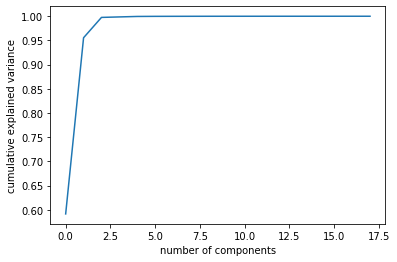

In [71]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Số chiều từ 3 trở lên đã có thể giữ được trên 97% thông tin.

Ta chọn số chiều cần giảm xuống là 4.

In [72]:
pca = PCA(4)
X_pca = pca.fit_transform(X)
X_pca.shape

(974891, 4)

In [0]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split( X_pca, y, test_size=0.2)

## Naïve Bayes with PCA

In [0]:
gnb = GaussianNB()
model = gnb.fit(X_train_pca, y_train)

In [75]:
y_pred = model.predict(X_test_pca)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    194979
           1       0.00      0.00      0.00         0

    accuracy                           0.88    194979
   macro avg       0.50      0.44      0.47    194979
weighted avg       1.00      0.88      0.94    194979



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Naive Bayes cho kết quả không tốt khi cho tất cả các dự đoán đều là 0.

Ta dùng Threahold để tìm kết quả tốt nhất.

In [0]:
thresholds  = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [77]:
for tr in thresholds:
    y_pred = np.where(model.predict_proba(X_test_pca)[:,1] < tr, 0, 1)
    print(tr)
    print(classification_report(y_pred, y_test))

0.1
              precision    recall  f1-score   support

           0       0.04      0.91      0.07      6679
           1       0.97      0.12      0.22    188300

    accuracy                           0.15    194979
   macro avg       0.50      0.51      0.14    194979
weighted avg       0.94      0.15      0.21    194979

0.2


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94    194979
           1       0.00      0.00      0.00         0

    accuracy                           0.88    194979
   macro avg       0.50      0.44      0.47    194979
weighted avg       1.00      0.88      0.94    194979

0.3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94    194979
           1       0.00      0.00      0.00         0

    accuracy                           0.88    194979
   macro avg       0.50      0.44      0.47    194979
weighted avg       1.00      0.88      0.94    194979

0.4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94    194979
           1       0.00      0.00      0.00         0

    accuracy                           0.88    194979
   macro avg       0.50      0.44      0.47    194979
weighted avg       1.00      0.88      0.94    194979

0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94    194979
           1       0.00      0.00      0.00         0

    accuracy                           0.88    194979
   macro avg       0.50      0.44      0.47    194979
weighted avg       1.00      0.88      0.94    194979

0.6


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94    194979
           1       0.00      0.00      0.00         0

    accuracy                           0.88    194979
   macro avg       0.50      0.44      0.47    194979
weighted avg       1.00      0.88      0.94    194979

0.7


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94    194979
           1       0.00      0.00      0.00         0

    accuracy                           0.88    194979
   macro avg       0.50      0.44      0.47    194979
weighted avg       1.00      0.88      0.94    194979

0.8


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94    194979
           1       0.00      0.00      0.00         0

    accuracy                           0.88    194979
   macro avg       0.50      0.44      0.47    194979
weighted avg       1.00      0.88      0.94    194979

0.9
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    194979
           1       0.00      0.00      0.00         0

    accuracy                           0.88    194979
   macro avg       0.50      0.44      0.47    194979
weighted avg       1.00      0.88      0.94    194979



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Không có giá trị Threahold nào cho kết quả tốt trên Naive Bayes.

Naive Bayes không hoạt động tốt với PCA.

## Decision Tree with PCA

In [0]:
clf = tree.DecisionTreeClassifier()
model = clf.fit(X_train_pca, y_train)

In [79]:
y_pred = model.predict(X_test_pca)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89    171305
           1       0.24      0.24      0.24     23674

    accuracy                           0.81    194979
   macro avg       0.57      0.57      0.57    194979
weighted avg       0.81      0.81      0.81    194979



Tỷ lệ recall và precision khá tương đồng nhưng các dự đoán bằng 1 có độ chính xác khá thấp. 

Decision Tree học không tốt với PCA nhưng tốt hơn Naive Bayes.

In [0]:
# tree.plot_tree(model)

## Random Forest with PCA

In [81]:
clf = RandomForestClassifier()
model = clf.fit(X_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [82]:
y_pred = model.predict(X_test_pca)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93    190060
           1       0.08      0.38      0.13      4919

    accuracy                           0.87    194979
   macro avg       0.53      0.64      0.53    194979
weighted avg       0.96      0.87      0.91    194979



Random Forest cũng hoạt động không tốt với PCA

Sau khi sử dụng PCA giảm số chiều về 4, Naïve Bayes và Decision Tree có độ chính xác giảm lớn hơn 10%. Đối với Random Forest có độ chính xác tốt hơn.

## Gradient Boosting with PCA

In [83]:
model = GradientBoostingClassifier()
model.fit(X_train_pca, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [84]:
y_pred = model.predict(X_test_pca)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    194976
           1       0.00      0.33      0.00         3

    accuracy                           0.88    194979
   macro avg       0.50      0.61      0.47    194979
weighted avg       1.00      0.88      0.94    194979



Gradient Boosting cho kết quả không tốt với PCA.

# SVM with PCA

In [0]:
# model = SVC()
# model.fit(X_train_pca, y_train)

In [0]:
# y_pred = model.predict(X_test_pca)
# print(classification_report(y_pred, y_test))

# GridsearchCV

Sử dụng 100 000 sample để turning.

In [0]:
# X_train['Delay'] = y
data_grid_search = X_train.sample(n=10000 , random_state=2)

In [0]:
X = data_grid_search.drop(columns=['Delay'])
y = data_grid_search['Delay']

In [0]:
data_gr = data.sample(n=10000, random_state=2)

In [0]:
X = data_gr.drop(columns=['Delay'])
y = data_gr['Delay']
columns = ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum',
           'Cancelled', 'Diverted', 'CRSDepTime_Hours', 'CRSDepTime_Minutes', 'CRSArr_Hours','CRSArr_Minutes']
for column in columns:
    le = preprocessing.LabelEncoder()
    X[column] = le.fit_transform(X[column])

In [0]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

### Decision Tree GridsearchCV

In [181]:
clf = DecisionTreeClassifier()
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [ 3, 5, 7], 
              'min_samples_split': [ 2, 3, 5,],
              'min_samples_leaf': [8, 10, 12,]
             }
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train_pca, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [182]:
grid_obj.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 12,
 'min_samples_split': 3}

In [183]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1777
           1       0.75      0.81      0.78       223

    accuracy                           0.95      2000
   macro avg       0.87      0.89      0.88      2000
weighted avg       0.95      0.95      0.95      2000



GridsearchCV cho kết quả khá tốt.

### Random Forest GridsearchCV

In [190]:
clf = RandomForestClassifier()
parameters = {'n_estimators': [9, 12, 14, 16], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [ 10, 15, 20, 25], 
              'min_samples_split': [5, 7, 9, 11],
              'min_samples_leaf': [1,5,8]
             }
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train_pca, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=14,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [191]:
grid_obj.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 14}

In [192]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1769
           1       0.82      0.85      0.84       231

    accuracy                           0.96      2000
   macro avg       0.90      0.91      0.91      2000
weighted avg       0.96      0.96      0.96      2000



Random Forest đạt kết quả khá tốt khi sử dụng GridsearchCV.

### GradientBoosting GridsearchCV

In [0]:
# clf =  GradientBoostingClassifier()
# parameters = {
#     "learning_rate": [0.01, 0.03, 0.1],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#     "max_depth":[3,5,8],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.85, 1.0],
#     "n_estimators":[10, 30, 100]
#     }
# acc_scorer = make_scorer(accuracy_score)

# grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
# grid_obj = grid_obj.fit(X_train_pca, y_train)

# clf = grid_obj.best_estimator_

# clf.fit(X_train_pca, y_train)

In [0]:
# grid_obj.best_params_

In [0]:
# y_pred = clf.predict(X_test_pca)
# print(classification_report(y_pred, y_test))

# LogisticRegression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

Lấy 500000 dữ liệu.

In [0]:
data_lr = data.sample(n=500000)


In [202]:
data_lr.shape

(500000, 22)

### Convert dữ liệu dạng category về onehot encoding

Kiểm tra các giá trị unique

In [203]:
for column in data_lr.columns:
    print(column, ': ', len(data_lr[column].unique()))

Month :  12
DayofMonth :  31
DayOfWeek :  7
UniqueCarrier :  20
FlightNum :  7424
TailNum :  5283
ActualElapsedTime :  467
CRSElapsedTime :  424
AirTime :  443
ArrDelay :  467
Origin :  300
Dest :  300
Distance :  1365
TaxiIn :  51
TaxiOut :  151
Cancelled :  1
Diverted :  1
CRSDepTime_Hours :  23
CRSDepTime_Minutes :  60
CRSArr_Hours :  23
CRSArr_Minutes :  60
Delay :  2


TailNum và FlightNum chứa nhiều giá trị unique và khổng ảnh hưởng đến kết quả nên ta sẽ loại bỏ.

In [0]:
data_lr.drop(columns=['TailNum', 'FlightNum'], inplace=True)

In [0]:
columns = ['UniqueCarrier', 'Origin', 'Dest', 'Month', 'DayofMonth', 'DayOfWeek',
           'Cancelled', 'Diverted', 'CRSDepTime_Hours', 'CRSDepTime_Minutes', 'CRSArr_Hours','CRSArr_Minutes']

Onehot encoding

In [0]:
for i in columns:
    dfDummies = pd.get_dummies(data_lr[i], prefix = i)
    data_lr = pd.concat([data_lr, dfDummies], axis=1)
data_lr.drop(columns = columns, inplace=True)

In [207]:
data_lr.shape

(500000, 846)

MinMaxScaler

In [0]:
scaler = MinMaxScaler(feature_range=(0.1, 1))
columns = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'Distance', 'TaxiIn', 'TaxiOut']
data[columns] = scaler.fit_transform(data[columns])

In [0]:
X = data_lr.drop(columns=['Delay'])
y = data_lr['Delay']

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [211]:
lr = LogisticRegression(penalty = 'l2')
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
y_pred = lr.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87849
           1       1.00      1.00      1.00     12151

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000



Logistic Regression đạt kết quả 100% cho tất cả các sample. -> Model có thể bị overfitting.

# LogisticRegression with PCA

In [0]:
data_lr = data.sample(n=500000)

In [0]:
data_lr.drop(columns=['TailNum', 'FlightNum'], inplace=True)
columns = ['UniqueCarrier', 'Origin', 'Dest', 'Month', 'DayofMonth', 'DayOfWeek',
           'Cancelled', 'Diverted', 'CRSDepTime_Hours', 'CRSDepTime_Minutes', 'CRSArr_Hours','CRSArr_Minutes']
for i in columns:
    dfDummies = pd.get_dummies(data_lr[i], prefix = i)
    data_lr = pd.concat([data_lr, dfDummies], axis=1)
data_lr.drop(columns = columns, inplace=True)

StandardScaler

In [0]:
scaler = StandardScaler()
columns = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'Distance', 'TaxiIn', 'TaxiOut']
data[columns] = scaler.fit_transform(data[columns])

In [0]:
X = data_lr.drop(columns=['Delay'])
y = data_lr['Delay']

In [219]:
pca = PCA(n_components=300)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

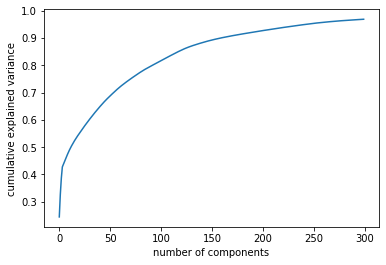

In [220]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [221]:
pca = PCA(300)
X_pca = pca.fit_transform(X)
X_pca.shape

(500000, 300)

In [0]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split( X_pca, y, test_size=0.2)

In [223]:
lr = LogisticRegression(penalty = 'l2')
lr.fit(X_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [224]:
y_pred = lr.predict(X_test_pca)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87867
           1       0.98      0.99      0.99     12133

    accuracy                           1.00    100000
   macro avg       0.99      0.99      0.99    100000
weighted avg       1.00      1.00      1.00    100000



LogisticRegression với PCA đạt kết quả khá tốt.

# Conclusions

Naive Bayes, Decision Tree, Random Forest đều cho kết quả khá tốt khi không sử 
dụng PCA. Decision Tree cho kết quả tốt nhất.

Say khi sử dụng PCA, kết quả tất cả các thuật toán đều giảm, Naive Bayes không học được gì, Decision Tree vẫn cho kết quả tốt nhất.

-> Decision Tree cho kết quả tốt nhất.

LogisticRegression khi không sử dụng PCA đạt kết quả 100% với cả 2 loại Delay và không Delay -> có thể bị overfitting. Sau khi sử dụng PCA số chiều giảm xuống còn 300 thì kết quả không còn tốt nữa.